#### Условие
Существует маркетплейс, который запимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу. Продакт-менеджер переживает за продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предлагает полную свободу действий, главное — чтобы метрики росли и компания не причиняла неудобства клиентам.
#### Есть следующий список задач:
- Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.
- Задача 2: Определить, существует ли product/market fit у этого маркетплейса.
- Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.
- Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
- Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.
- Задача 6: Сформулировать выводы о проделанной работе. 

# Посмотрим на данные

In [3]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from operator import attrgetter

In [5]:
# Прочитаем все данные и запишим их в переменные
customers = pd.read_csv('customers.csv')
orders    = pd.read_csv('orders.csv')
items     = pd.read_csv('order_items.csv')

#### Посмотрим на датафреймы, выведем информацию о типах столбцов и количестве не нулевых значений

In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Переведем все столбцы с датой в нужный тип

In [21]:
orders['order_purchase_timestamp']      = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']             = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']  = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

items['shipping_limit_date']            = pd.to_datetime(items['shipping_limit_date'])

In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# Задание 1

In [26]:
# Объединим две таблицы с данными (клиенты и заказы)
customers_orders = customers.merge(orders, on='customer_id', how='left')

In [28]:
# Создадим копию данных только с доставленными заказами
customers_orders_copy = customers_orders.query('order_status == "delivered"').copy()

In [30]:
# Выделим месяц и день заказов и представим их в виде периода 
customers_orders_copy['order_month'] = customers_orders_copy['order_purchase_timestamp'].dt.to_period("M")
customers_orders_copy['order_day']   = customers_orders_copy['order_purchase_timestamp'].dt.to_period("D")

In [32]:
# Для каждого уникального клиента найдем дату в виде месяца и дня его первой покупки и представим их в виде периода
customers_orders_copy['cohort_month'] = customers_orders_copy.groupby('customer_unique_id', as_index=False)\
                                                             .order_purchase_timestamp.transform('min')
customers_orders_copy['cohort_day']   = customers_orders_copy.groupby('customer_unique_id', as_index=False)\
                                                             .order_purchase_timestamp.transform('min')
customers_orders_copy['cohort_month'] = customers_orders_copy['cohort_month'].dt.to_period('M')
customers_orders_copy['cohort_day']   = customers_orders_copy['cohort_day'].dt.to_period('D')

In [34]:
# Считаем разнизу между датами текущего заказа и первого. Делим это на 30 и получаем количество
# месяцев, через которое клиент сделал повторный заказ
customers_orders_copy['number_month'] = np.floor((customers_orders_copy.order_day - customers_orders_copy.cohort_day).apply(attrgetter('n')) / 30)

In [36]:
customers_orders_copy.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_day,cohort_month,cohort_day,number_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05-16,2017-05,2017-05-16,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01-12,2018-01,2018-01-12,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05-19,2018-05,2018-05-19,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03-13,2018-03,2018-03-13,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07-29,2018-07,2018-07-29,0.0


In [38]:
# Группируем данные по когортам и номеру когорты и считаем количество людей в каждой группе
df_cohort = customers_orders_copy.groupby(['cohort_month', 'number_month'], as_index=False)\
                                 .agg(n_customers=('customer_unique_id', 'nunique'))

In [40]:
df_cohort.head()

,cohort_month,number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [42]:
# Создаем сводную таблицу для представления данных в удобном виде
cohort_pivot = df_cohort.pivot_table(index='cohort_month', columns='number_month', values='n_customers')

In [44]:
cohort_pivot

number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Так как retention представляется в виде долей, поделим каждое число клиентов, которые вернулись, 
# на соответсвующее число клиентов нулевого месяца 
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [48]:
retention_matrix

number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


## Рассчитаем медианный retention первого месяца

In [51]:
retention_matrix[1.0].median()

0.0035460992907801418

## Найдем когорту с самым высоким retention на 3-й месяц 

In [54]:
retention_matrix[retention_matrix[3.0] == retention_matrix[3.0].max()].index[0]

Period('2017-01', 'M')

Медианный retention оказался равен `0.35%`, а когорта с самым высоким retention на 3-й месяц равна `2017-01`

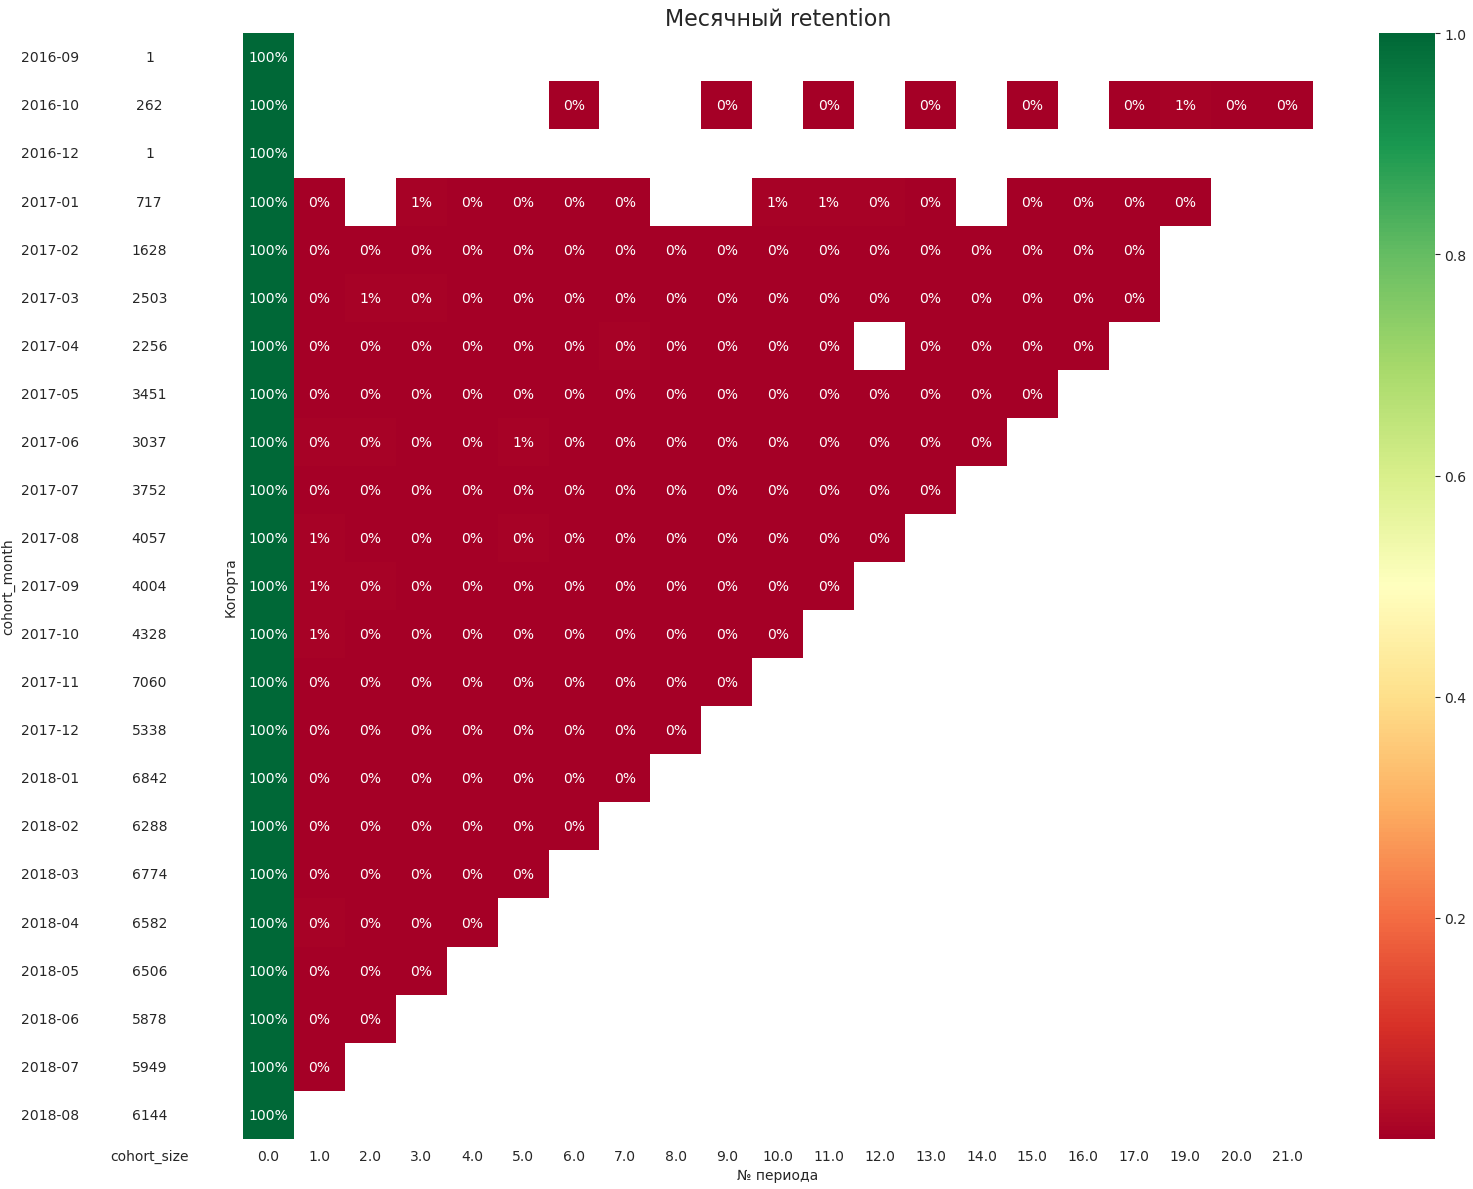

In [57]:
from matplotlib import colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('Месячный retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    fig.tight_layout()

Вывод: Для расчета retention я взял только доставленные (delivered) заказы, после чего рассчитал месячный retention, который оказался равен `0.35%`. Когорта с самым высоким retention на 3-й месяц - это `2017-01`. Проведен когортный анализ, который демонстрирует очень плохие показатели продукта по удержанию клиентов. Из этого следует, что клиенты делают всего один заказ и больше не используют продукт.

# Задание 2

#### Чтобы точно убедиться в том,  есть ли PMF, возьмем самый лучший месяц по количеству клиентов, совершивших сделку

C:\Users\777\AppData\Local\Temp\ipykernel_1264\380483811.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mask = df_cohort[df_cohort.n_customers == df_cohort.n_customers.max()].iloc[0][0]


<Axes: xlabel='number_month', ylabel='n_customers'>

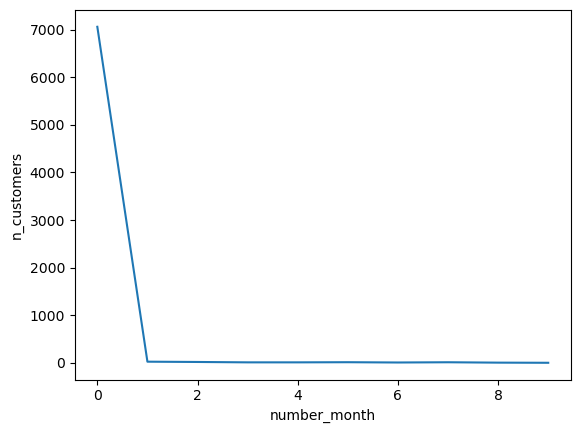

In [61]:
mask = df_cohort[df_cohort.n_customers == df_cohort.n_customers.max()].iloc[0][0]
best_month = df_cohort[df_cohort['cohort_month'] == mask]
# plt.figure(figsize=(12, 8))
sns.lineplot(data=best_month, x='number_month', y='n_customers')

График дает понять, что продукт имеет резкий скачок "постоянных покупателей" к почти нулевому значению

In [63]:
# Посчитаем сколько в среднем заказов делает один пользователь
number_order_per_client = customers_orders_copy.groupby('customer_unique_id', as_index=False).agg({'order_id': 'count'}).order_id.sum()
number_unique_client = customers_orders_copy.customer_unique_id.nunique()
avg_order = number_order_per_client / number_unique_client
print(f'В среднем один пользователь делает {avg_order:.4f} заказа')

В среднем один пользователь делает 1.0334 заказа


### Выводы

Исходя из когортного анализа и приведенного выше графика можно сказать, что PMF в данном продукте отсутствует:
- Медианный Retention критически низкий - всего `0.35%`;
- Среднее количество заказов на одного пользователя составляет `1.0334`, это означает, что почти все клиенты делают один заказ.

Можно сказать, что маркетплейс фактически держится на постоянном притоке новых пользователей, и именно поэтому он до сих пор не закрылся.

В ближайшее время маркетплейс должен сконцентрироваться на улучшении удержания клиентов в продукте, иначе убытки будут только расти. Возможные причины отсутсвия PMF: 
1. Товары из Бразилии могут быть не такими востребованными, люди покупают один раз и больше не нуждаются в них;
2. Возникают проблемы на стороне маркетплейса, например, товар доставлен, но люди не довольны временем доставки или качеством товара;
3. Данный продукт может не иметь достаточного ценностного предложения и не как не выделяется на фоне конкурентов.

# Задание 3

Выбранные метрики:
1. Рост продаж маркетплейса (GMV) - метрика отражает общий объем продаж через маркетплейс за определенный период. Она показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход;
2. MAU - позволяет отследить уникальное количество пользователей, которые совершили хотя бы одну покупку;
3. Activation Rate - данная метрика позволит отследить насколько новые клиенты заинтересованы в маркетплейсе. Активацией, например, может быть полное прохождение онбординга;
4. Retention - отражает вовлеченность клиента в продолжение использования продукта;
5. ARPPU - показывает среднюю выручку с одного клиента.

### GMV

In [73]:
# Объединим последнию таблицу данных с уже имеющейся и оставим только доставленные заказы
full_df = customers_orders.merge(items, on='order_id', how='left').query('order_status == "delivered"')
full_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [75]:
# Выделим месяц и год заказа
full_df['order_month'] = full_df.order_purchase_timestamp.dt.to_period('M')

In [77]:
monthly_gmv = full_df.groupby('order_month', as_index=False).price.sum().reset_index().drop('index', axis=1)
monthly_gmv['order_month'] = monthly_gmv['order_month'].astype(str)
monthly_gmv.columns = ['order_month', 'GMV']

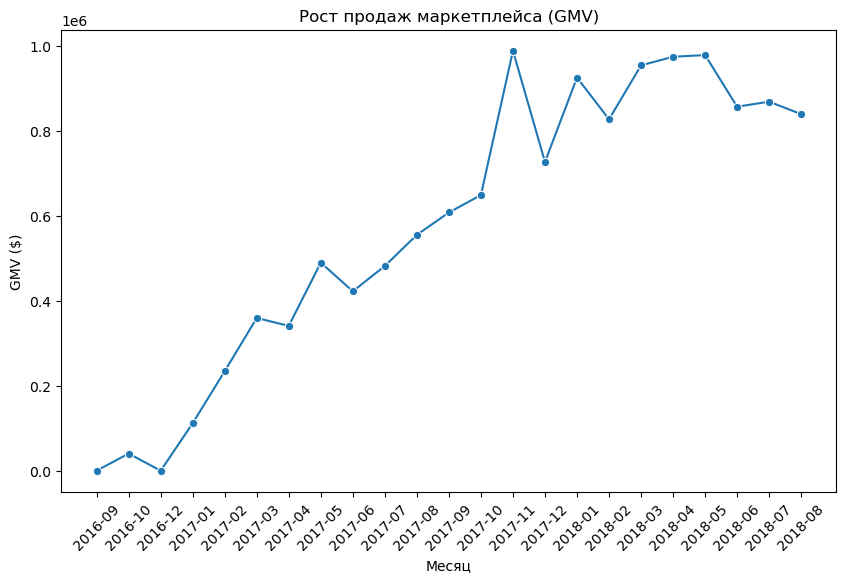

In [79]:
# Визуализируем
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_gmv, x='order_month', y='GMV', marker='o')
plt.title('Рост продаж маркетплейса (GMV)')
plt.xlabel('Месяц')
plt.ylabel('GMV ($)')
plt.xticks(rotation=45)

plt.show()

### Расчитаем MAU, чтобы оценить объем аудитории, которой продукт доставляет ценность

In [82]:
# Расчитываем MAU 
df_mau = full_df.groupby("order_month", as_index=False).agg(mau=('customer_unique_id', "nunique"))
df_mau['order_month'] = df_mau['order_month'].astype(str)

<Axes: title={'center': 'Количество уникальных пользователей в месяц'}, xlabel='Дата', ylabel='Количество пользователей'>

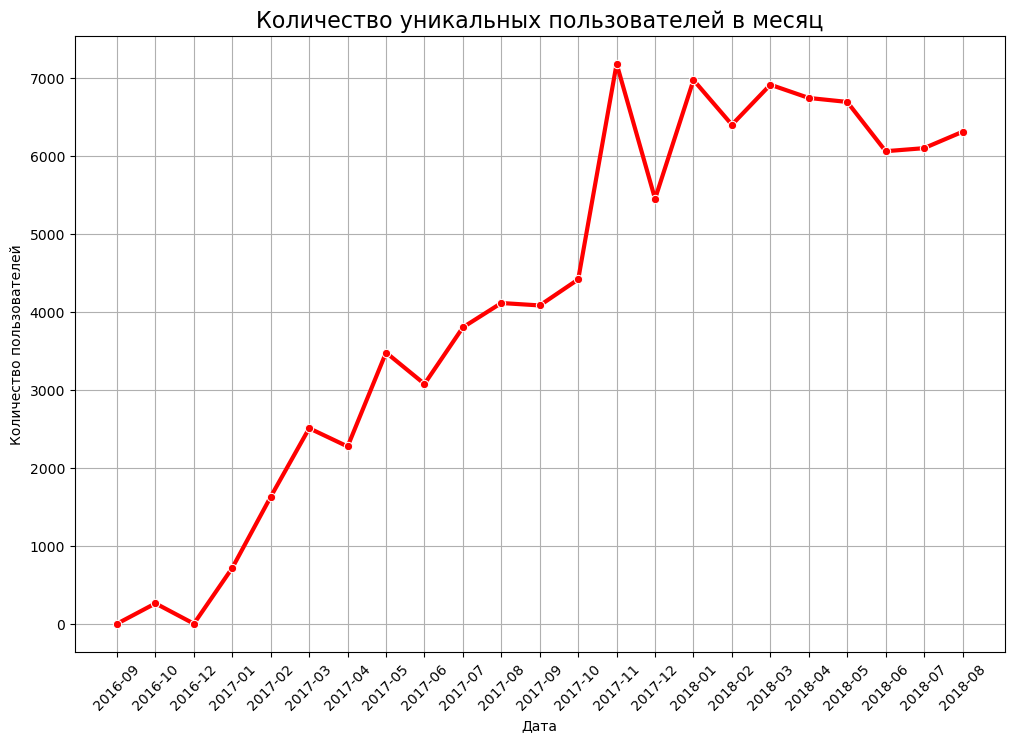

In [86]:
fig, ax_mau = plt.subplots(1, figsize=(12, 8))
ax_mau.set_title('Количество уникальных пользователей в месяц', fontsize=16)
ax_mau.tick_params("x", rotation=45)
ax_mau.grid()
ax_mau.set(xlabel='Дата', ylabel='Количество пользователей')
sns.lineplot(data=df_mau, x='order_month', y='mau', color="r", linewidth=3, marker='o')

### Retention

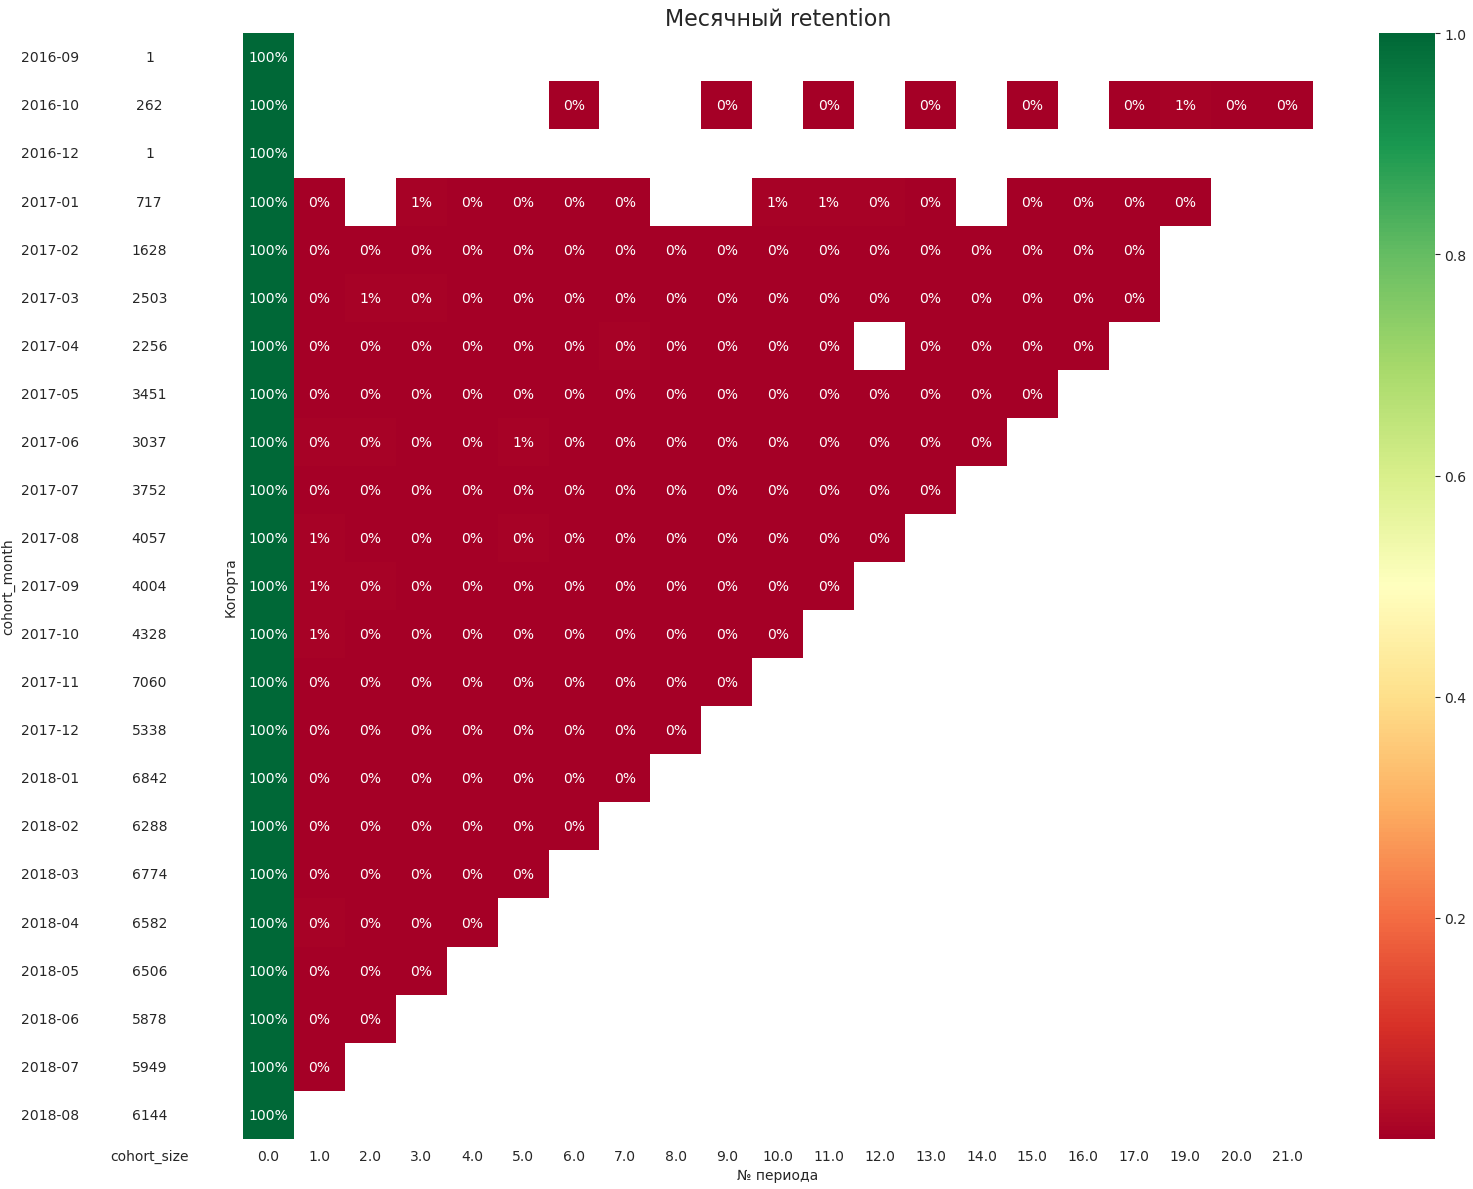

In [89]:
from matplotlib import colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('Месячный retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    fig.tight_layout()

### ARPPU

In [92]:
# Создадим датафрейм с выручкой по каждому клиенту
revenue_per_user = full_df.groupby(["customer_unique_id", 'order_month'], as_index=False).agg(revenue=('price', 'sum'))

In [94]:
# Считаем общую вырочку и количество клиентов в месяц
arpu_df = revenue_per_user.groupby('order_month', as_index=False).agg(
    n_cust=('customer_unique_id', 'nunique'),
    total_revenue=('revenue', 'sum')        
)

In [96]:
# Считаем ARPPU
arpu_df['arpu'] = round(arpu_df.total_revenue / arpu_df.n_cust, 2)
arpu_df['order_month'] = arpu_df['order_month'].astype(str)
arpu_df.head()

,order_month,n_cust,total_revenue,arpu
0,2016-09,1,134.97,134.97
1,2016-10,262,40325.11,153.91
2,2016-12,1,10.90,10.90
3,2017-01,718,111798.36,155.71
4,2017-02,1630,234223.40,143.70


<Axes: title={'center': 'Средняя выручка с одного клиента в месяц'}, xlabel='Дата', ylabel='Выручка'>

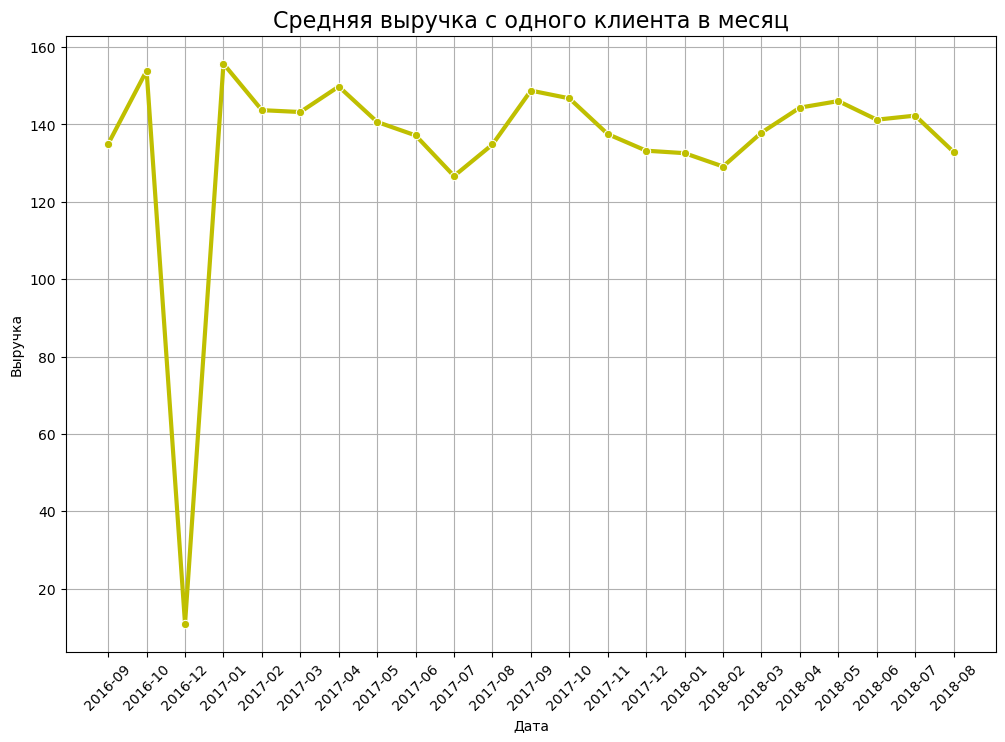

In [100]:
fig, ax_arpu = plt.subplots(1, figsize=(12, 8))
ax_arpu.set_title('Средняя выручка с одного клиента в месяц', fontsize=16)
ax_arpu.tick_params("x", rotation=45)
ax_arpu.set(xlabel='Дата', ylabel='Выручка')
ax_arpu.grid()
sns.lineplot(data=arpu_df, x='order_month', y="arpu", color="y", linewidth=3, marker='o')

Вывод: Улучшение выбранных метрик должно помочь компании увеличть прибыль и отследить развитие продукта в целом.

# Задание 4

Продакт-менеджер с командой сформулировали 3 гипотезы, из которой нужно выбрать приоритетную на данный момент с помощью фреймворка ICE. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact.

Для расчёта Impact возьмем данные с июня 2017 года, а конверсия в повторный заказ равна величине медианного retention 1-го месяца.

Гипотезы:
1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен. Рассчтанные Confidence и Ease соответственно равны 8 и 6.	
2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. Рассчтанные Confidence и Ease соответственно равны 10 и 4.	
3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов. Рассчтанные Confidence и Ease соответственно равны 5 и 9.	

Значения Impact переводятся в соответствии следующим значениями метрики:
- 1 - (0 - 50)
- 2 - (51 - 150)
- 3 - (151 - 350)
- 4 - (351 - 750)
- 5 - (751 - 1550)
- 6 - (1551 - 3150)
- 7 - (3151 - 6350)
- 8 - (6351 - 12750)
- 9 - (12751 - 25550)
- 10 - (25551 - 51 150)

Для каждой метрики будем считать количество пользователей, проблема которых будет решена засчет внедерения гипотезы

In [108]:
# Возьмем все данные с июня 2017 года
df_from_2017 = customers_orders.merge(items, on='order_id', how='left').query('order_purchase_timestamp >= "2017-06-01"')

### Расчет Impact для первой гипотезы
Возьмем клиентов, заказы которых были отменены

In [111]:
# Посчитаем количество отмененных заказов 
df_from_2017.query("order_status in ('canceled', 'unavailable')").order_id.nunique()

974

#### 974 попадает в диапозон Impact со значением 5.

### Расчет Impact для второй гипотезы
Посмотрим на клиентов, чьи заказы были доставлены после установленного срока

In [115]:
# Найдем количество заказов, которые были доставлены после установленного срока
df_from_2017.query("order_estimated_delivery_date < order_delivered_customer_date").order_id.nunique()

7296

#### Таких заказов оказалось 7296, что дает нам значение Impact равное 8.

### Расчет Impact для третьей гипотезы
Найдем количество клиентов, которые ждали подтверждение своего заказа более одного дня

In [119]:
# Рассчитаем количество клиентов, которые ждали подтверждение заказа более одного дня 
df_from_2017[df_from_2017.order_approved_at - df_from_2017.order_purchase_timestamp > pd.Timedelta(days=1)].order_id.nunique()

15268

#### 15268 человек ждали заказ дольше одного дня, что эквивалентно 9 при переводе в шкалу Impact.

В итоге мы получаем следующие значения ICE:
- Гипотеза 1 - `I=5`, `C=8`, `E=6` ==> `ICE=5*8*6=240`
- Гипотеза 2 - `I=8`, `C=10`, `E=4` ==> `ICE=8*10*4=320`
- Гипотеза 3 - `I=9`, `C=5`, `E=9` ==> `ICE=9*5*9=405`

Исходя из значений ICE нужно выбирать 3-ю гипотезу:
"Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов."

# Задание 5

Метрики, на которые повлияет гипотеза:
- Общее количество заказов
- Общая выручка маркетплейса
- ARPU
- Retention
- LTV
- Удовлетворенность клиентов

**Целевая метрика**: Количество повторных заказов.
Это самая важная метрика, которая напрямую связана с гипотезой. Успешное внедрение нового способа оплаты позволит увеличить количество повторных заказов, что, в свою очередь, увеличит и общее число заказов.

**Прокси-метрика**: Конверсия брошенных не пустых корзин с заказами.
Эта метрика позволит увидеть изменения, так как с решением основной проблемы, меньше клиентов будут останавливаться на этапе оплаты и бросать свои корзины.

**Guardrail-метрика**: Среднее время оформления (подтверждения) заказа.
Важно следить за тем, чтобы изменения не пошли в худшую сторону

# Задание 6

Проблема продукта
Так как данный продукт является маркетплейсом, то для его жизнедеятельности важно, чтобы люди задерживались в нем, повторно покупали товары. В данном примере удержание клиентов (retention) находится на очень низком уровне, что не характерно для маркетплейсов и что нужно явно улучшать.

1) В 1 пункте был проведен когортный анализ, который показал критически слабые показатели retention. Получен retention первого месяца - `0.35%` и найдена когорта с самым высоким retention - `2017-01`

2) На 2 этапе было выявлено, что PMF в продукте отсутствует. Одной из причин может являться низкий retention. Также были рассмотрены возможные причины отсутствия PMF

3) В 3 задаче были представлены 5 метрик, которые помогут маркетплейсу увеличить прибыль. Также предоставлены текущие показатели, показывающие состояние компании в последнее время.

4) В 4 пункте с помощью фреймворка ICE была выбрана гипотеза, которая на данный момент бизнесу нужнее всего. После расчета Impact для каждой гипотезы, лучшей оказалась третья.

5) В последнем этапе были сформулированы метрики, на которые выбранная гипотеза должна повлиять. Целевая метрика достаточно точно отражает основной показатель, выбранный в гипотезе. Прокси-метрика позволит быстро заметить движения от внедрения новой функции, а guardrail-метрика не даст продукту получить ухудшение. 

**Общий вывод**: На данный момент продукт имеет хороший приток новых клиентов, но не может их удержать. Внедрение функции из выбранной гипотезы должно помочь с удержанием клиентов, что даст маркетплейсу больше возможностей для улучшения

**Рекомендации**: После внедрения нового способа оплаты, важно не забывать о других гипотезах, ведь они тоже могут внести свой вклад в развитие продукта. Снижение количества отмен заказа позволит удовлетворять больше клиентов и принесет больше прибыли. А уменьшение времени доставки создаст приятное впечатление о продукте и пользователи будут больше заказывать повторно. Также можно рассмотреть улучшение спроса на товары, потому что сейчас товары продаются не равномерно, можно выделить лидеры продаж. Можно попробовать улучшить скорость доставки товара, ведь сейчас есть товары, которые идут больше месяца.